# Ayudantía 10 : Aprendizaje de Máquina


Contenido de la ayudantía: <a href="https://www.notion.so/Ayundat-a-10-Aprendizaje-de-M-quinas-290e4744c6348078a17dc3298bcf3ead?source=copy_link"> Ayudantía 10 - Notion</a>

In [25]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## I . Regresión artificial

### 1. Regresión artificial


Crearemos datos sintéticos para una regresión lineal simple, entrenaremos un modelo de regresión lineal usando Scikit-Learn, y evaluaremos su desempeño.

Vamos a simular una relación lineal:

$$
y = 2.3x + 1 + \epsilon
$$

Definiendo:

$$
X := \text{"horas de estudio por día"}
$$

$$
y := \text{"nota obtenida"}
$$


In [32]:
# 1  
# Vamos a simular una relación lineal: y = 2.3x + 1 + ruido
# X : = "horas de estudio x dia"
# y : = "nota obtenida"

X = 2 * np.random.rand(100, 1)  # hrs estudio (entre 0 y 2, con forma (100, 1))
y = 1 + 2.3 * X + np.random.randn(100, 1) # nota = 1 + 2.3 *hrs estudio + ruido aleatorio



### 2. Visualizar los datos generados

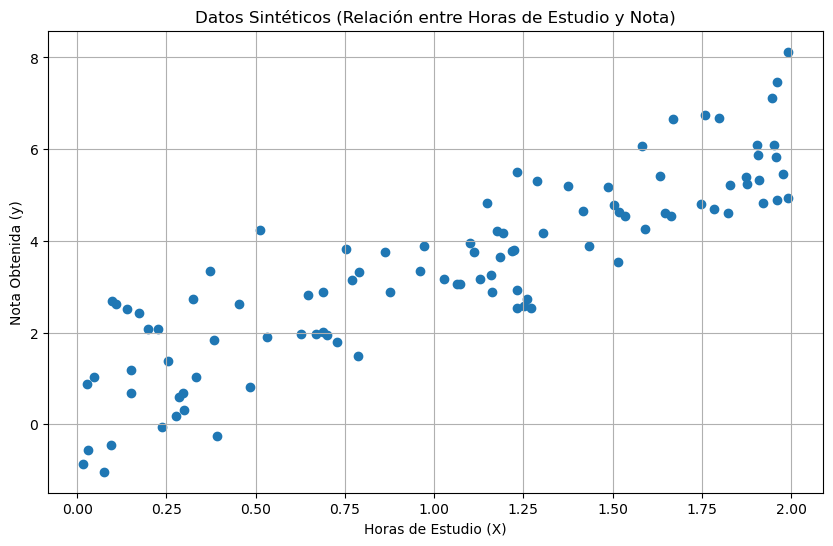

In [33]:
# 2
plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.title('Datos Sintéticos (Relación entre Horas de Estudio y Nota)')
plt.xlabel('Horas de Estudio (X)')
plt.ylabel('Nota Obtenida (y)')
plt.grid(True)
plt.show()

### 3.  División Train/Test

In [34]:
# 3. Separamos en entrenamiento (Train) y prueba (Test) 
# random_state=42 es una "semilla" [punto de partida] para que el proceso sea reproducible

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de X_test: {X_test.shape}")

Forma de X_train: (80, 1)
Forma de X_test: (20, 1)


### 4. Entrenar el modelo de regresión lineal

In [35]:
# 4 crear modelo de regresion lineal

modelo_regresion = LinearRegression()

# El modelo "aprende" la mejor línea recta para los datos (X_train, y_train)
modelo_regresion.fit(X_train, y_train)

# Podemos ver los coeficientes aprendidos, recordemos que estamos tratando de simular algo como :
# y =  1 + 2.3x + epsilon
print(f"Intercepto (b0) aprendido: {modelo_regresion.intercept_[0]}")
print(f"Pendiente (b1) aprendida: {modelo_regresion.coef_[0][0]}")


Intercepto (b0) aprendido: 0.5077436764860166
Pendiente (b1) aprendida: 2.772179660080165


### 5. Evaluemos el modelo

In [36]:
# 5 evaluar si el training funciono bien 
y_pred = modelo_regresion.predict(X_test)

# se comparan las predicciones (y_pred) con las respuestas reales (y_test)
# una métrica para ver si se entreno bien es el MSE (Mean Squared Error - MSE)
# mientras más bajo el MSE, mejor.
mse = metrics.mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE) en datos de Test: {mse:.2f}")

# tambien el R^2 (Coeficiente de Determinación)
# buscamos que sea cercano a 1 
r2 = metrics.r2_score(y_test, y_pred)
print(f"Coeficiente R^2 en datos de Test: {r2:.2f}")



Error Cuadrático Medio (MSE) en datos de Test: 0.76
Coeficiente R^2 en datos de Test: 0.77


### 6. Graficar los resultados

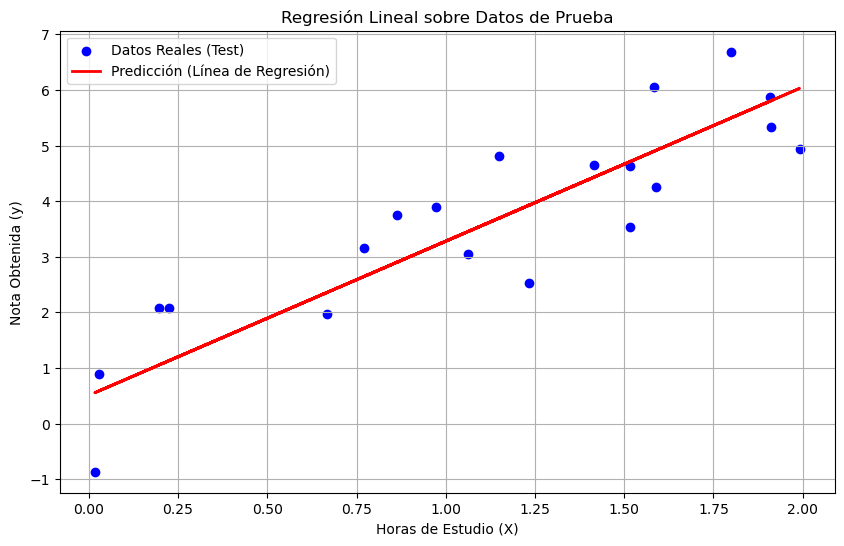

In [37]:
# 6 fraficar predicciones vs realidad
# Graficamos los datos de PRUEBA (Test) y la línea de regresión que aprendió el modelo

plt.figure(figsize=(10, 6))
# datos de prueba (puntos azules)
plt.scatter(X_test, y_test, color='blue', label='Datos Reales (Test)')
# linea de prediccion 
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicción (Línea de Regresión)')

plt.title('Regresión Lineal sobre Datos de Prueba')
plt.xlabel('Horas de Estudio (X)')
plt.ylabel('Nota Obtenida (y)')
plt.legend()
plt.grid(True)
plt.show()

## II. Regresión con datos reales

Ahora, usaremos datos reales. Esto implica un desafío y le da sentido a lo aprendido anteriormente. La principal diferencia con los datos sintéticos es que ahora no sabemos si la relación es **lineal**. Tenemos que descubrirlo. Esto nos lleva a lo que hemos estado viendo anteriormente : el Análisis Exploratorio de Datos (EDA).

### 1. EDA 

In [43]:
import pandas as pd
import seaborn as sns

In [40]:
data = 'https://www.statlearning.com/s/Advertising.csv' 
df = pd.read_csv(data, index_col=0) 
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


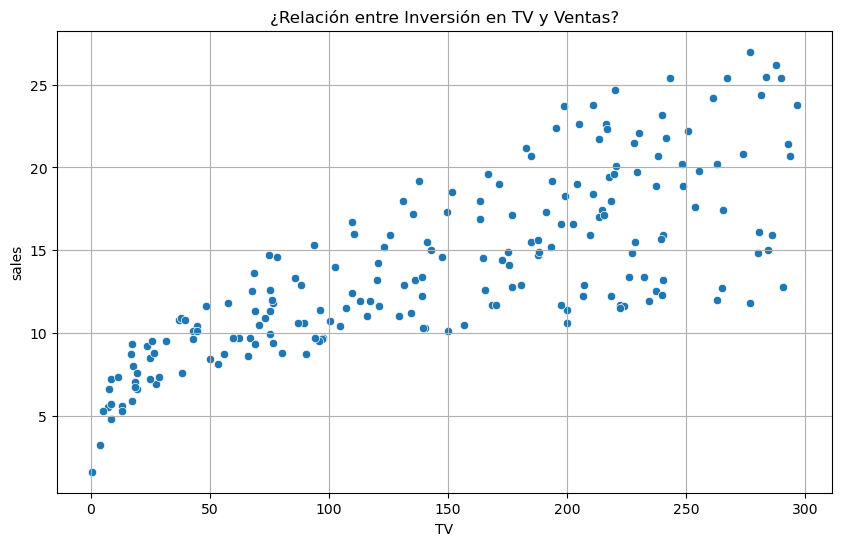

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TV', y='sales')
plt.title('¿Relación entre Inversión en TV y Ventas?')
plt.grid(True)
plt.show()

Como podemos ver en el gráfico, parece existir una clara relación lineal positiva. A más inversión en TV, más ventas. Esto justifica usar Regresión Lineal.

### 2. Crear modelo

In [46]:
X = df[['TV']] 
y = df['sales'] 

print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")

Forma de X: (200, 1)
Forma de y: (200,)


El Significado de $X$ (2D) vs $y$ (1D). Es que scikit-learn espera que $X$ sea una "matriz" (aunque sea de una sola columna), por eso $X = df[['TV']]$ (doble corchete).<br>
$y$ es un "vector", por eso $y = df['sales']$ (un corchete).


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)


In [48]:
regresion = LinearRegression()
regresion.fit(X_train, y_train)

LinearRegression()

In [49]:
# veamos como genero la "linea - ecuacion" 
print(f"Intercepto (b0) aprendido: {regresion.intercept_:.2f}")
print(f"Pendiente (b1) aprendida: {regresion.coef_[0]:.2f}")


Intercepto (b0) aprendido: 7.23
Pendiente (b1) aprendida: 0.05


In [50]:
# evaluamos con los test : 

y_pred = regresion.predict(X_test) 

# metricas en relacion con y_test 
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE) en datos de Test: {mse:.2f}")
print(f"Coeficiente R^2 en datos de Test: {r2:.2f}")

Error Cuadrático Medio (MSE) en datos de Test: 10.50
Coeficiente R^2 en datos de Test: 0.70


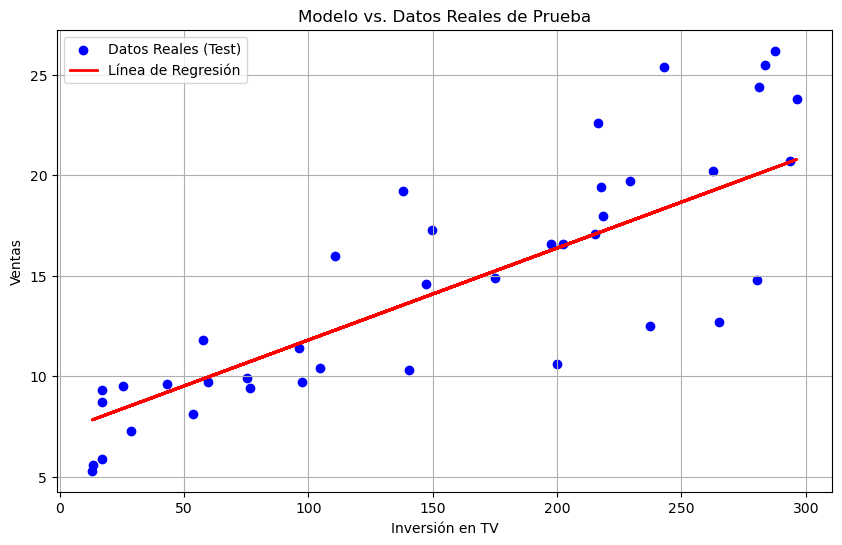

In [ ]:
plt.figure(figsize=(10, 6))
# daots prueba
plt.scatter(X_test, y_test, color='blue', label='Datos Reales (Test)')
# predict
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')

plt.title('Modelo vs. Datos Reales de Prueba')
plt.xlabel('Inversión en TV')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.show()

## III. Otro dataset - Student Performance

In [53]:
data_st = pd.read_csv("StudentsPerformance.csv")
data_st.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [54]:
data_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [56]:
data_st.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


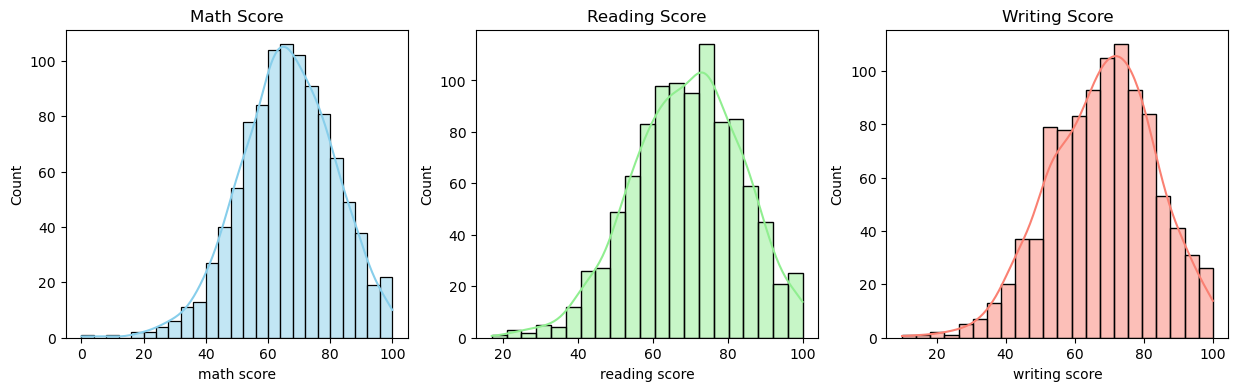

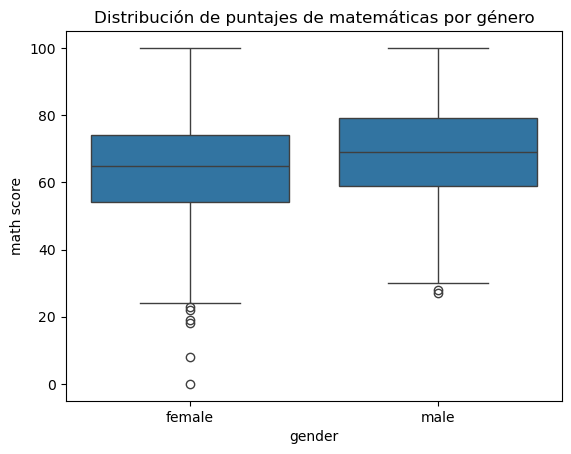

/var/folders/cw/q3kmrhcj05j6p8f0f9dpby7r0000gn/T/ipykernel_57896/966456275.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="parental level of education", y="math score", data=data_st, ci=None)


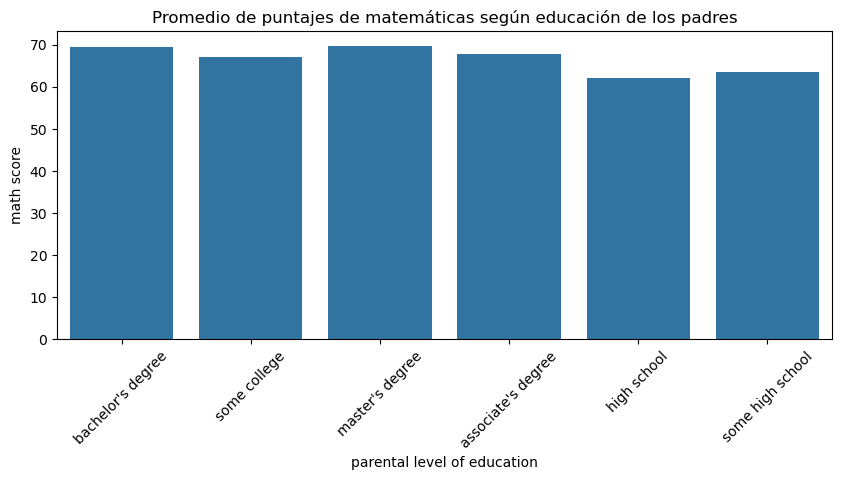

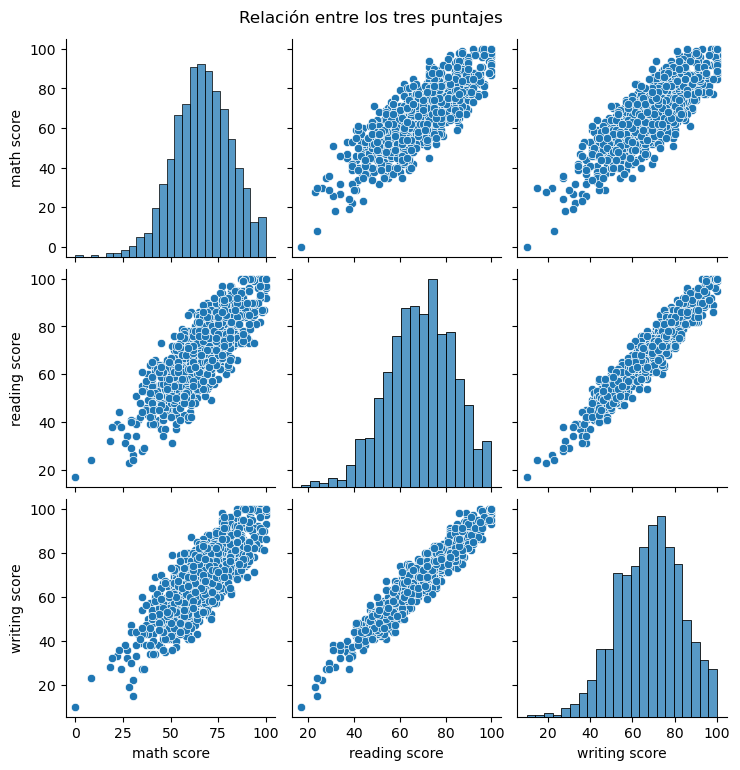

In [ ]:
# EDA mediante graficos.

# dist  de los puntajes
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.histplot(data_st["math score"], kde=True, ax=axes[0], color="skyblue")
sns.histplot(data_st["reading score"], kde=True, ax=axes[1], color="lightgreen")
sns.histplot(data_st["writing score"], kde=True, ax=axes[2], color="salmon")
axes[0].set_title("Math Score")
axes[1].set_title("Reading Score")
axes[2].set_title("Writing Score")
plt.show()

# dist math x genero
sns.boxplot(x="gender", y="math score", data=data_st)
plt.title("Distribución de puntajes de matemáticas por género")
plt.show()

# lvl educativo de los padres y rendimiento
plt.figure(figsize=(10, 4))
sns.barplot(x="parental level of education", y="math score", data=data_st, ci=None)
plt.title("Promedio de puntajes de matemáticas según educación de los padres")
plt.xticks(rotation=45)
plt.show()

# corr entre los puntajes
sns.pairplot(data_st[["math score", "reading score", "writing score"]])
plt.suptitle("Relación entre los tres puntajes", y=1.02)
plt.show()


Dado que tenemos variables numéricas (los puntajes) y categóricas (género, nivel educativo de los padres, etc.), podemos explorar varias relaciones interesantes. Para hacer esto recurriremos a `get_dummies` de pandas, que convierte variables categóricas en variables binarias (0 o 1), lo que facilita su uso en modelos de machine learning. En este caso para la Regresión Lineal.

In [59]:
# -> variables categóricas en dummies
df_encoded = pd.get_dummies(data_st, drop_first=True)

# separamos predictoras (X) y target (y)
X = df_encoded.drop("math score", axis=1)
y = df_encoded["math score"]

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)


In [60]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [62]:
coef_df = pd.DataFrame({
    "Variable": X_train.columns,
    "Coeficiente": modelo.coef_
}).sort_values(by="Coeficiente", ascending=False)

coef_df.head(10)


,Variable,Coeficiente
2,gender_male,13.387761
6,race/ethnicity_group E,5.008261
13,test preparation course_none,3.612024
12,lunch_standard,3.107215
8,parental level of education_high school,1.035765
11,parental level of education_some high school,0.985520
1,writing score,0.709640
3,race/ethnicity_group B,0.660208
10,parental level of education_some college,0.531539
0,reading score,0.254929


Esto nos indica que tanto influye cada variable en el puntaje de matemáticas

In [65]:
y_pred = modelo.predict(X_test)

# metricas
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")

Error cuadrático medio (MSE): 28.28
Coeficiente de determinación (R²): 0.88


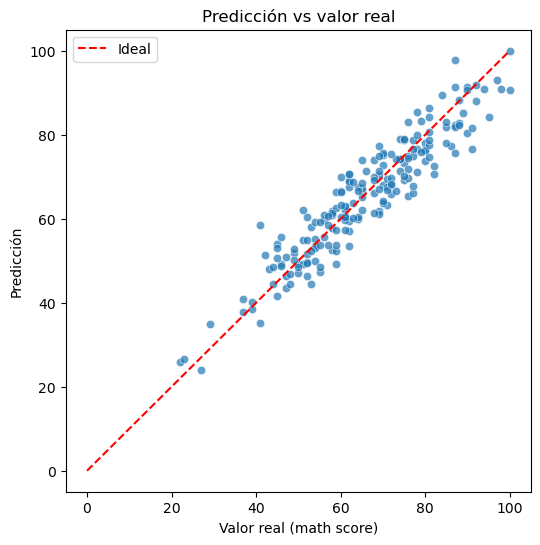

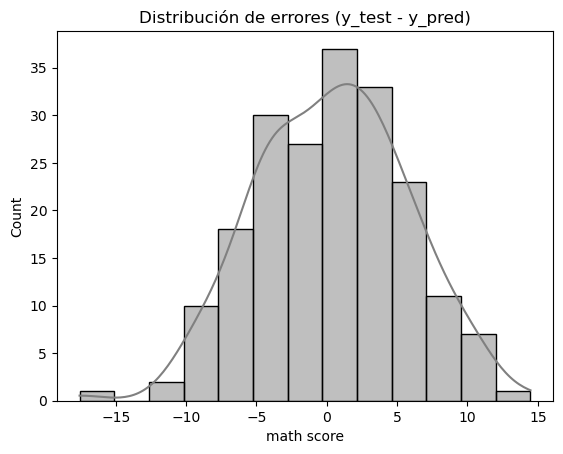

In [66]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([0, 100], [0, 100], color="red", linestyle="--", label="Ideal")
plt.xlabel("Valor real (math score)")
plt.ylabel("Predicción")
plt.title("Predicción vs valor real")
plt.legend()
plt.show()

# Distribución del error
errors = y_test - y_pred
sns.histplot(errors, kde=True, color="gray")
plt.title("Distribución de errores (y_test - y_pred)")
plt.show()

## para practicar :
1. Hacer Radio, Diario para dataset de marketing 
2. Hacer  Reading, Writing para dataset de notas .
3. Testear que columnas puedo dejar fuera . 
   